[Home](../../README.md)

### Model Training - Polynomial Regression

Linear regression assumes the data has a linear pattern. If your data does not have a linear pattern you can consider a polynomial regression algorithm that provides a multi (poly) coefficient linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Polynomial regression algorithm on the features you have engineered to see how closely we can predict the health outcomes for individuals.

#### Step 1

Load the required dependencies:

In [26]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

#### Step 2

Store the data columns for Linear Regression.

In [27]:
# Create a data frame from the csv file
training_data = pd.read_csv('2.3.2.training_data.csv')

x_name = ['BMI']
y_name = 'Target'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

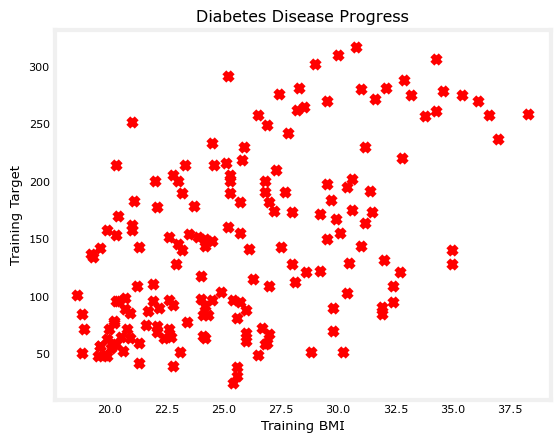

In [28]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

#### Step 4

Then save an instance of PolynomialFeatures, adjust the 'degree' parameter to suit your model and create the feature using the data in 'x'. (Note a degree of 1 is linear regression, each extra degree adds a coefficient).

Then use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [29]:
poly = PolynomialFeatures(degree=14, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

#### Step 5

Plot the features, targets and model (linear regression).

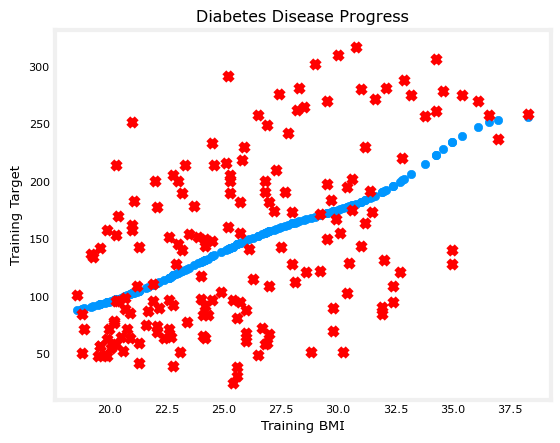

In [30]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

In [31]:
# save the poly to disk
poly_filename = 'my_saved_poly_v3.pkl'
pickle.dump(poly, open('../2.4.Model_Testing_and_Validation/' + poly_filename, 'wb'))

# save the model to disk
model_filename = 'my_saved_model_v3.sav'
pickle.dump(my_model, open('../2.4.Model_Testing_and_Validation/' + model_filename, 'wb'))

#### Step 6. Explore polynomial degrees

Students should now use the best features from Multiple Fetaure Linear Regression and apply some polynomial degrees to see if they can further improve the intuation of their model without overfitting.